In [63]:
#This one is useful
import numpy as np

f = open('../../LosAlamos/PRISM-1.2.0/prism-1.2/input/data/s1n_ame2012.bin', 'rb')
#f = open('test.bin', 'rb')

f.seek(4)
recl = np.fromfile(f, dtype=np.dtype('i4'), count=1)
print(recl)

data_ame = np.zeros((2274,3))
dict_ame = {}

for i in range(2274):
    f.seek(16+72*i)
    rZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(28+72*i)
    rN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(40+72*i)
    pZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(56+72*i)
    pN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(72+72*i)
    s1n = np.fromfile(f, dtype=np.dtype('f8'), count=1)

    data_ame[i] = (rZ[0],rN[0],s1n[0])
    dict_ame[(rZ[0],rN[0])] = s1n[0]
    
f.close()

[2274]


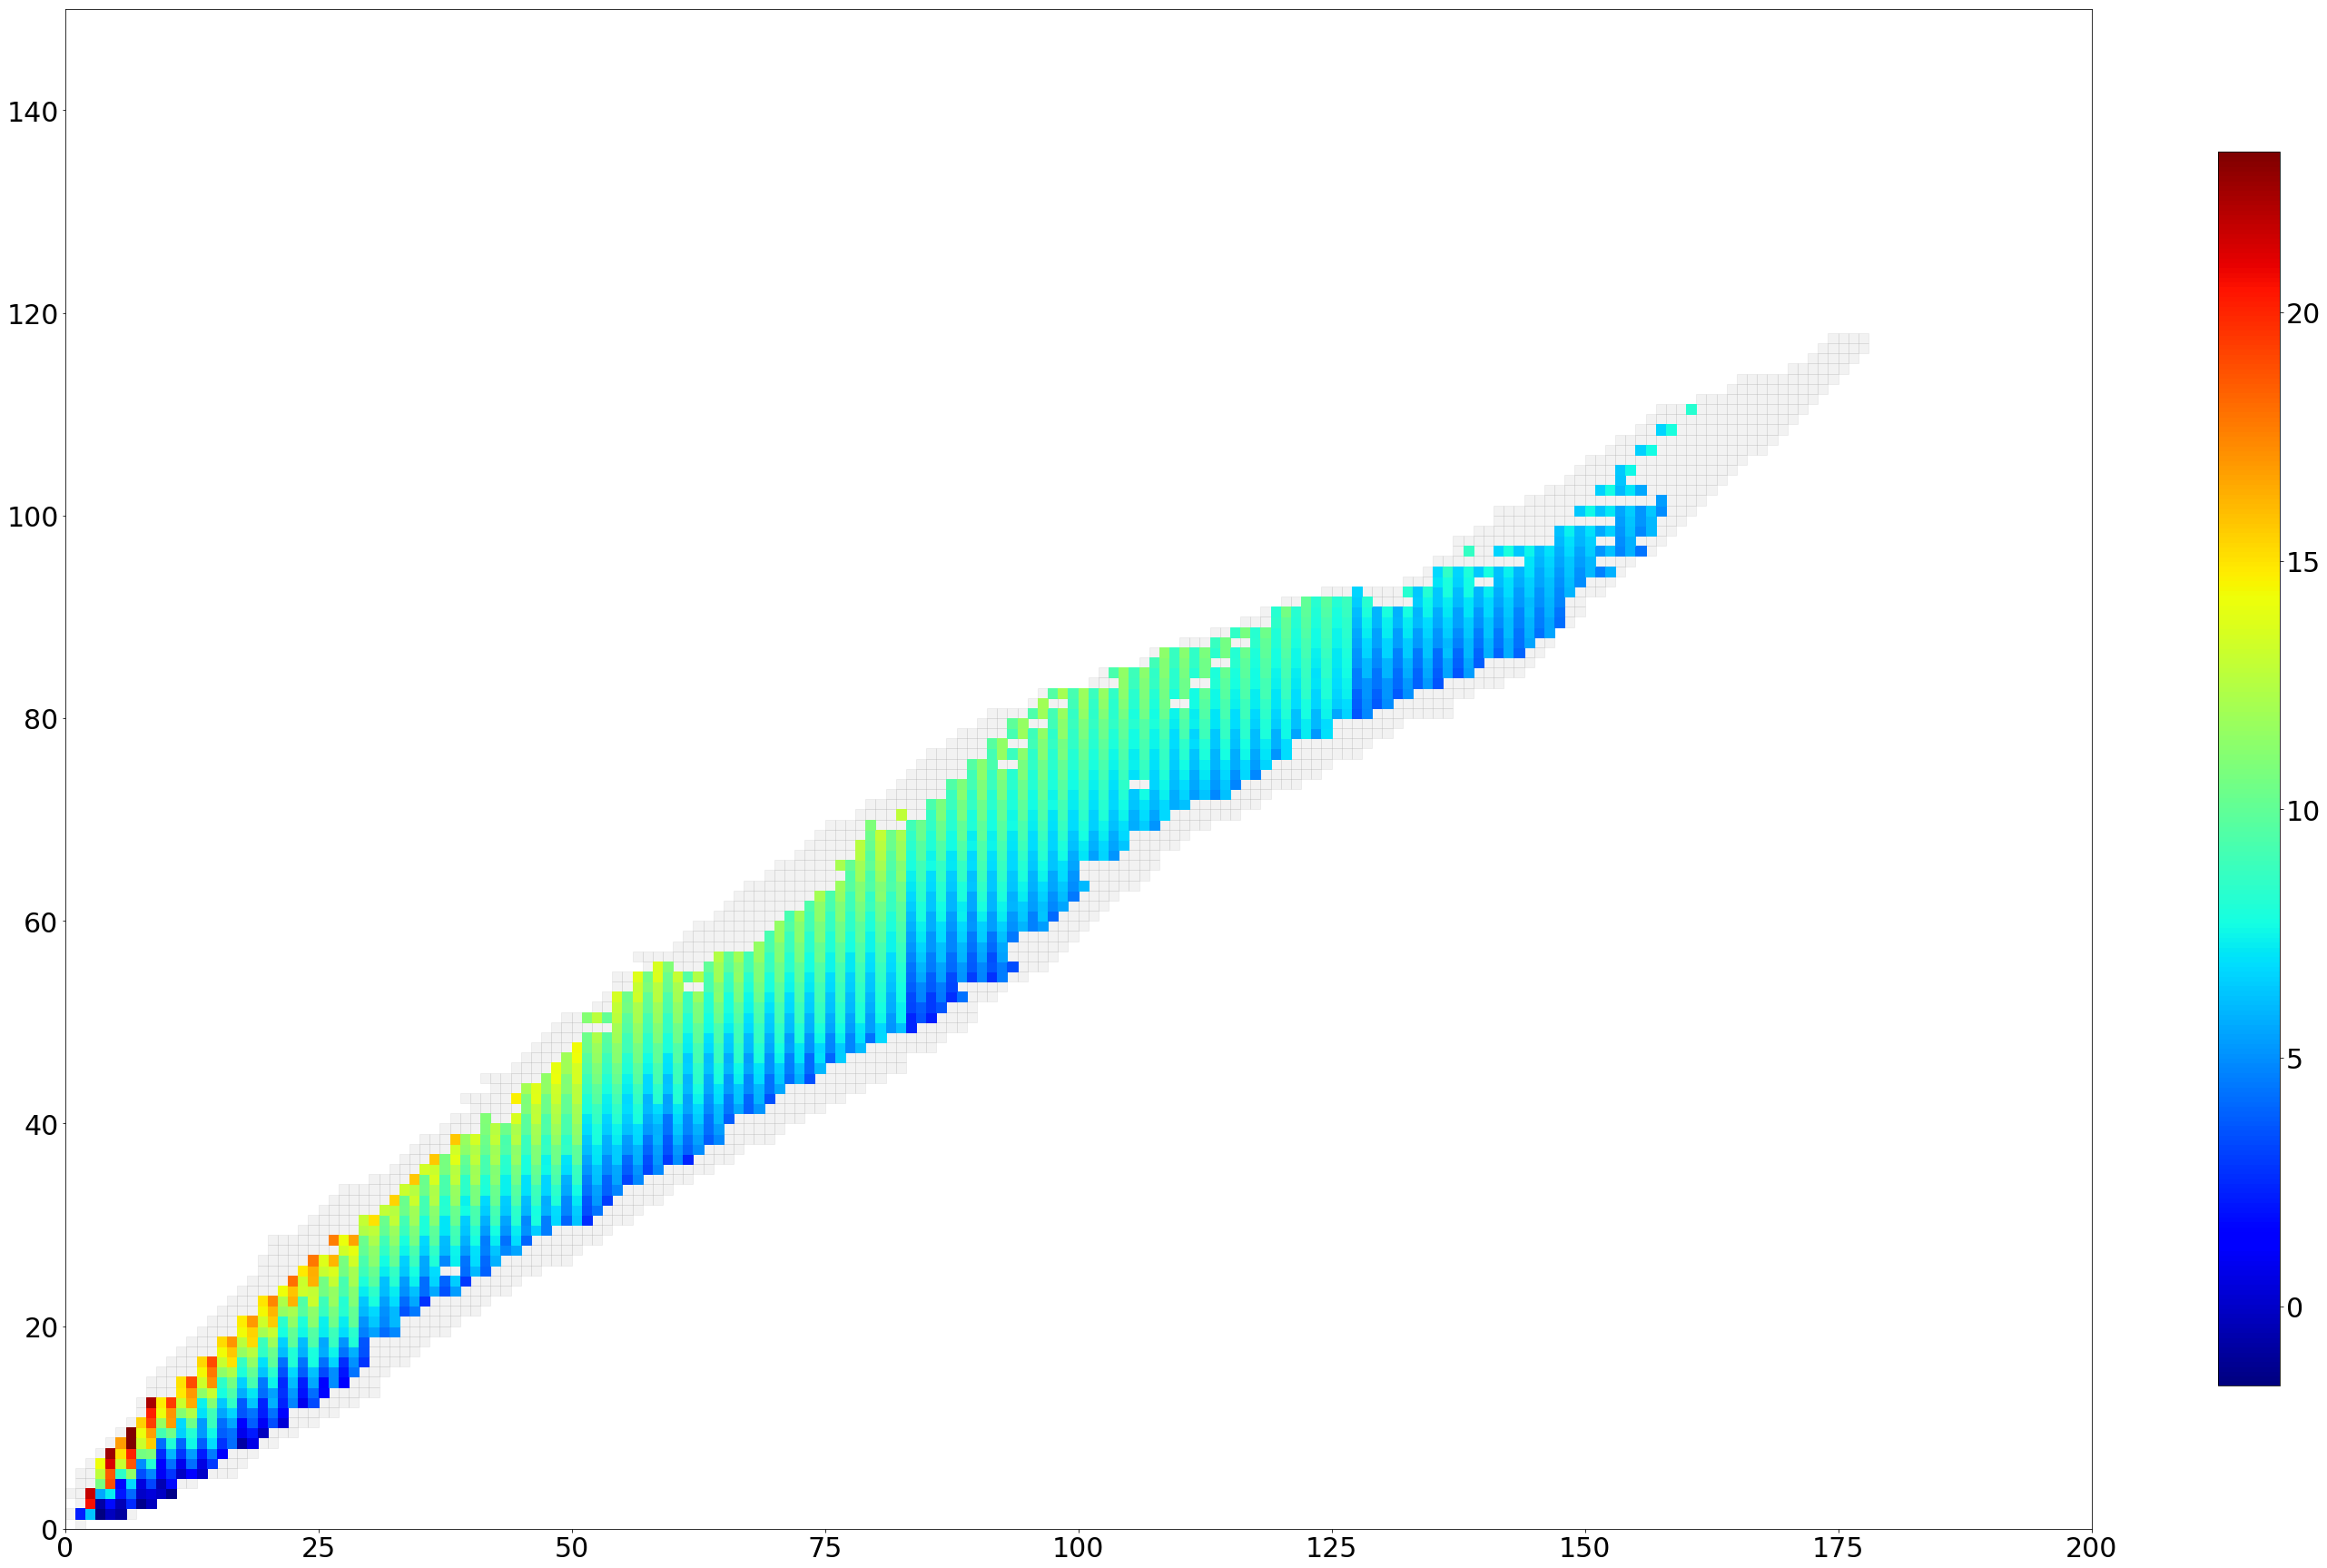

In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
mpl.rcParams.update({'font.size': 30}) 


df_grid = pd.read_csv("nuclear_wallet_card.dat",sep='\t')
grid_Z = df_grid.iloc[:,2].values
grid_N = df_grid.iloc[:,3].values
grid = []
for z,n in zip(grid_Z,grid_N):
    grid.append([n,z])

grid = np.unique(grid, axis=0)


fig, ax = plt.subplots(1,figsize=(50,50))
ax = plt.gca()

for i in range(len(grid)):
    rect=Rectangle(grid[i],1,1,alpha=0.1,color='grey',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect)

normal = plt.Normalize(data_ame.T[2].min(), data_ame.T[2].max())
colors = plt.cm.jet(normal(data_ame.T[2]))    
colors = colors.reshape(2274,4)

for x,y,c in zip(data_ame.T[1],data_ame.T[0],colors):
    rect = plt.Rectangle((x,y),1,1,edgecolor=None,color=c)
    ax.add_patch(rect)  

plt.xlim((0,200))
plt.ylim((0,150))
ax.set_aspect(aspect=1)
cax, _ = mpl.colorbar.make_axes(ax,shrink=0.5) 
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=plt.cm.jet,norm=normal)       

plt.show()

In [4]:
#This one is useful

f = open('../../LosAlamos/PRISM-1.2.0/prism-1.2/input/data/s1n_frdm2012.bin', 'rb')
#f = open('test.bin', 'rb')

f.seek(4)
recl = np.fromfile(f, dtype=np.dtype('i4'), count=1)
print(recl)

data_frdm = np.zeros((9189,3))
dict_frdm = {}

for i in range(9189):
    f.seek(16+72*i)
    rZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(28+72*i)
    rN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(40+72*i)
    pZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(56+72*i)
    pN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(72+72*i)
    s1n = np.fromfile(f, dtype=np.dtype('f8'), count=1)

    data_frdm[i] = (rZ[0],rN[0],s1n[0])
    dict_frdm[(rZ[0],rN[0])] = s1n[0]

[9189]


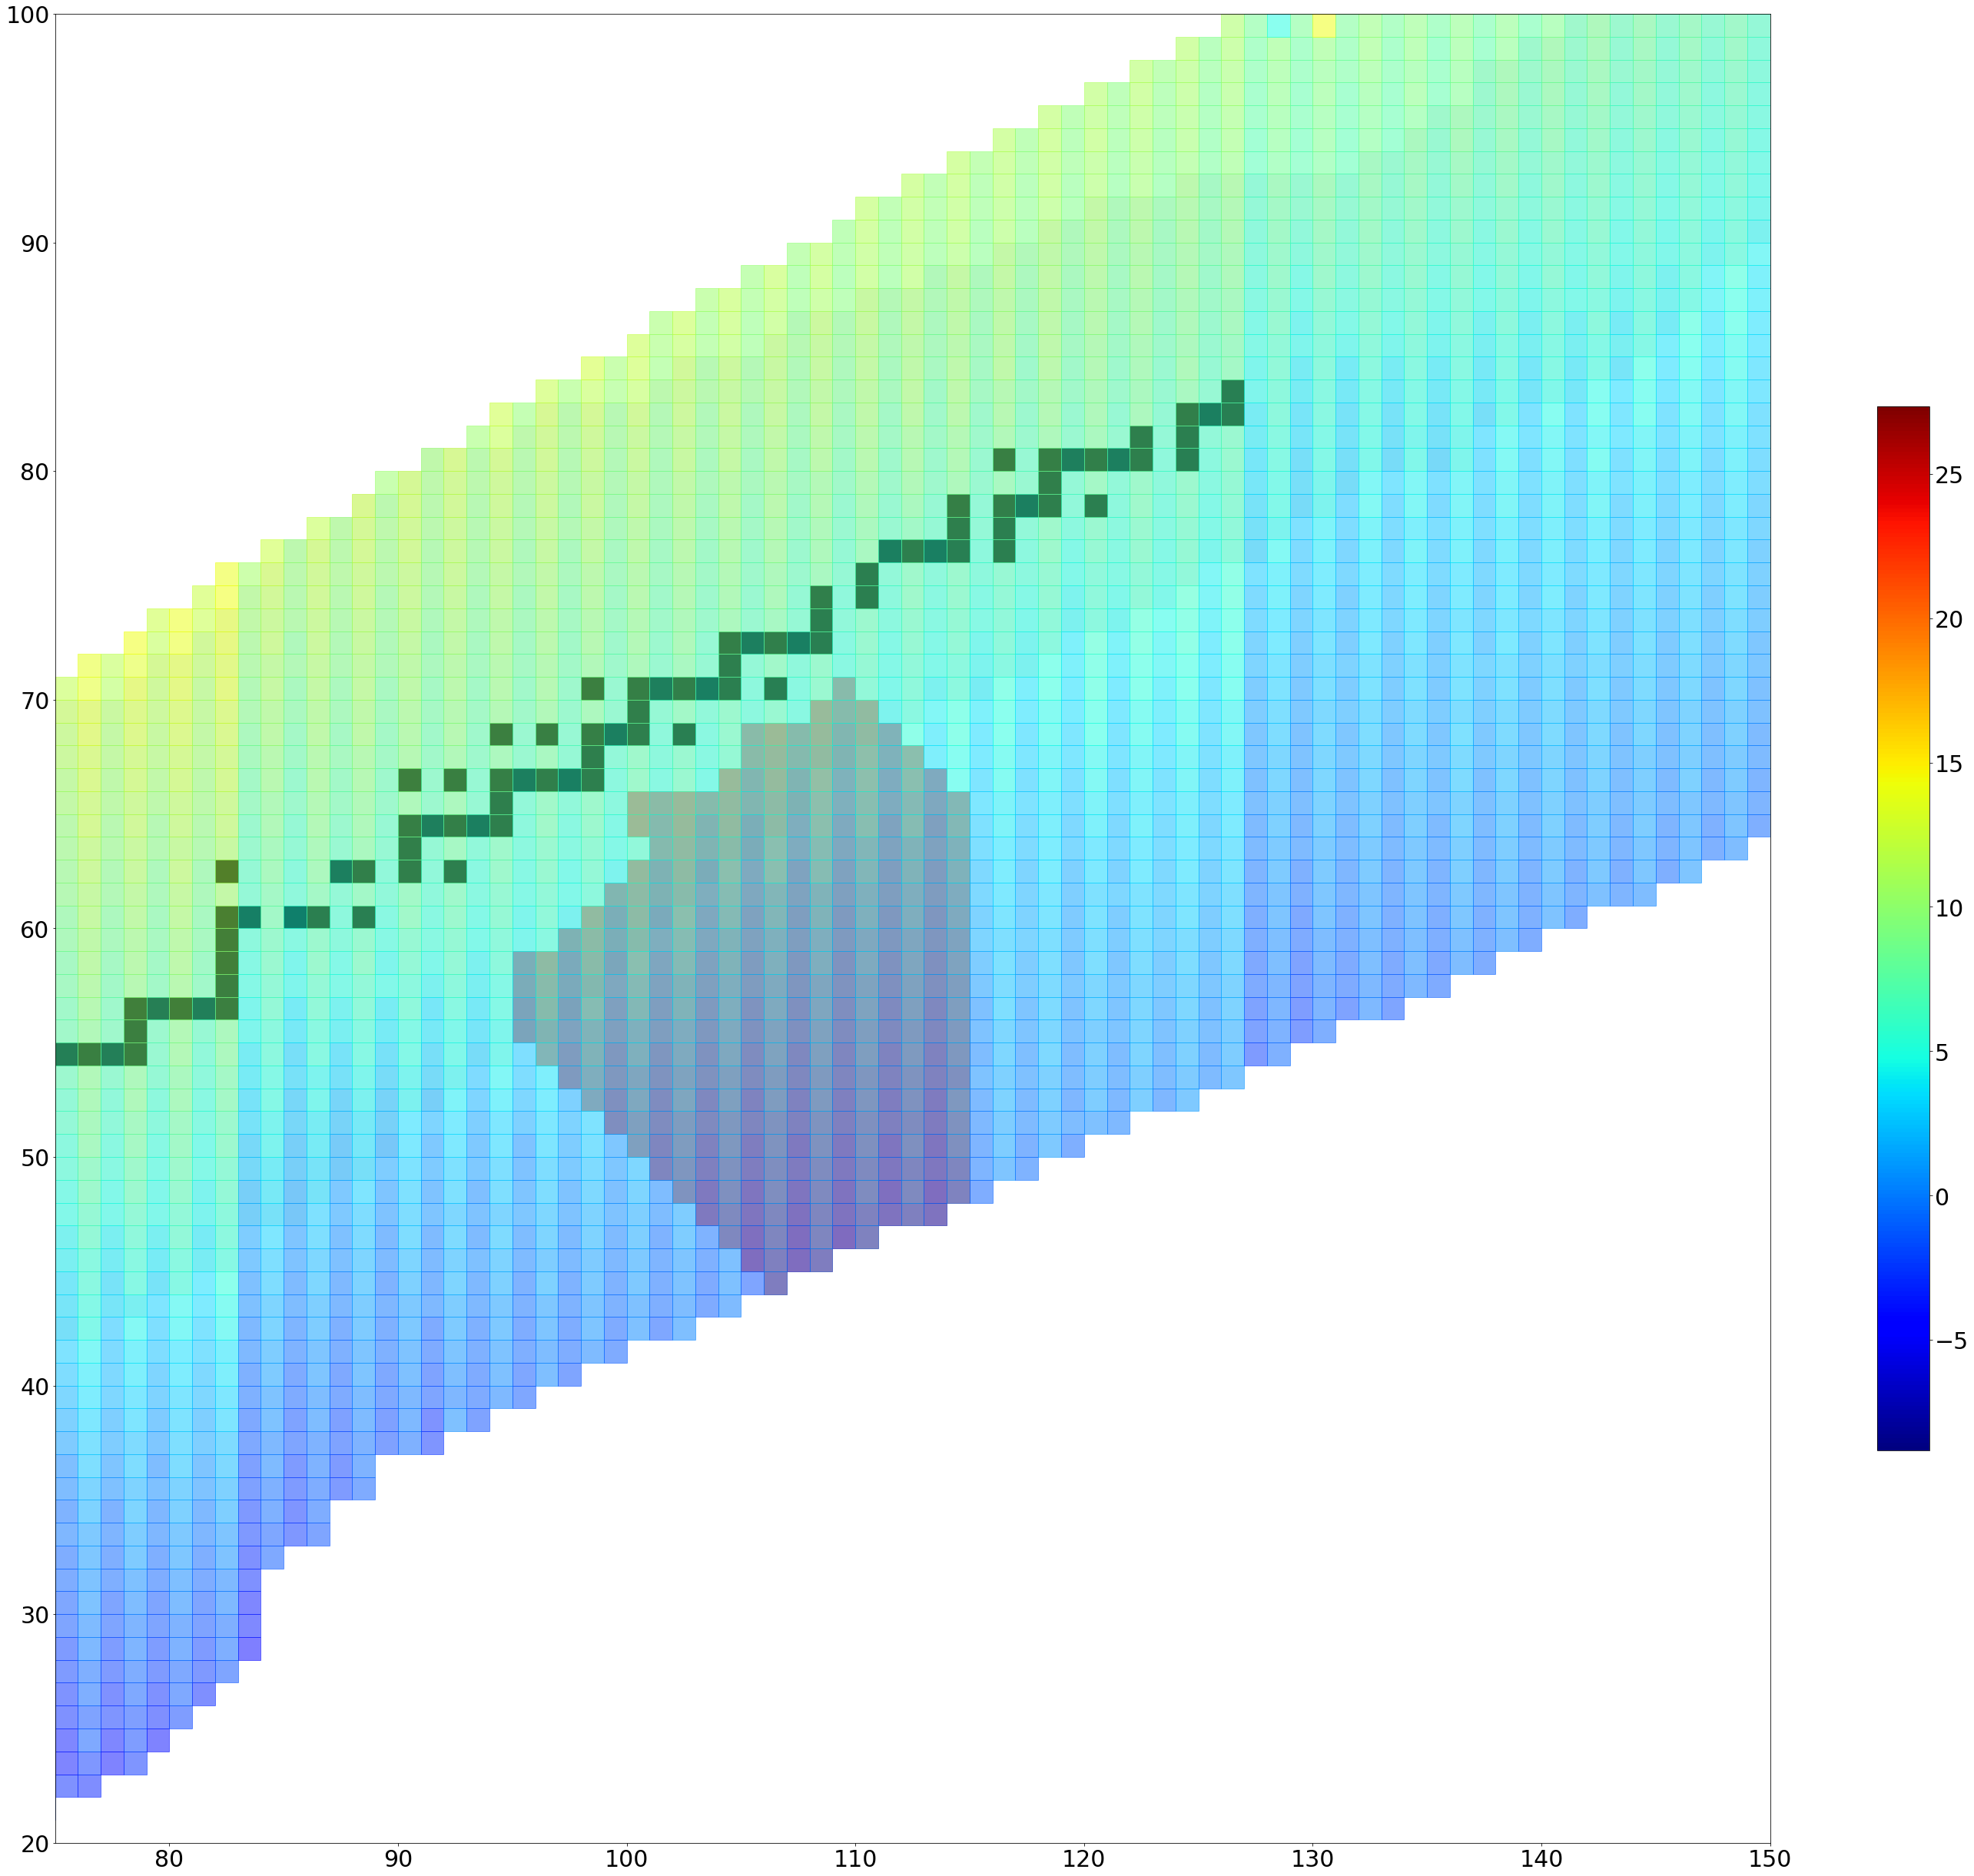

In [31]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
mpl.rcParams.update({'font.size': 30}) 

df_grid = pd.read_csv("nuclear_wallet_card.dat",sep='\t')
grid_Z = df_grid.iloc[:,2].values
grid_N = df_grid.iloc[:,3].values
grid_T12 = df_grid.iloc[:,8].str.replace(r"[\"\',]", '')
grid_T12 = grid_T12.str.rstrip()
grid_T12 = grid_T12.values

grid = []
for z,n in zip(grid_Z,grid_N):
    grid.append([n,z])

grid_stable = []
dict_stable = {}
for i in range(len(grid_T12)):
    if grid_T12[i]=='STABLE':
        grid_stable.append([grid_N[i],grid_Z[i]])
        dict_stable[grid_Z[i]]=grid_N[i]
        
grid = np.unique(grid, axis=0)


fig, ax = plt.subplots(1,figsize=(50,50))
ax = plt.gca()

for i in range(len(grid)):
    rect=Rectangle(grid[i],1,1,alpha=0.1,color='grey',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect)
    
for i in range(len(grid_stable)):
    rect_stable=Rectangle(grid_stable[i],1,1,color='black',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect_stable) 

for A in range(150,180,1):
    for N in range(95,115,1):
        Z = A - N
        pos = [N,Z]
        if ((N<=94) or (N>=95 and N<= 98 and Z < 66) or (N>=99 and N<= 100 and Z < 68) or (N>=101 and N<= 104 and Z < 70) or (N>=105 and N<=108 and Z < 72) or (N>108)) and (dict_frdm.get((Z,N)) != None) and (dict_ame.get((Z,N)) == None):
            rect_var=Rectangle(pos,1,1,alpha=0.5,color='red',edgecolor=None,clip_on=True,linewidth=None)
            ax.add_patch(rect_var)  

normal = plt.Normalize(data_frdm.T[2].min(), data_frdm.T[2].max())
colors = plt.cm.jet(normal(data_frdm.T[2]))    
colors = colors.reshape(9189,4)

for x,y,c in zip(data_frdm.T[1],data_frdm.T[0],colors):
    rect = plt.Rectangle((x,y),1,1,alpha=0.5,edgecolor=None,color=c)
    ax.add_patch(rect)  

plt.xlim((75,150))
plt.ylim((20,100))
ax.set_aspect(aspect=1)
cax, _ = mpl.colorbar.make_axes(ax,shrink=0.5) 
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=plt.cm.jet,norm=normal)       

plt.show()

In [18]:
dict_ame.get((1,9000)) == None

True

In [66]:
dict_frdm_var = {}

#for Z in range(44,71,1):
#    dict_frdm_var[Z]={}

for A in range(150,180,1):
    for N in range(95,115,1):
        Z = A - N
        pos = [N,Z]
        if ((N<=94) or (N>=95 and N<= 98 and Z < 66) or (N>=99 and N<= 100 and Z < 68) or (N>=101 and N<= 104 and Z < 70) or (N>=105 and N<=108 and Z < 72) or (N>108)) and (dict_frdm.get((Z,N)) != None) and (dict_ame.get((Z,N)) == None):
            dict_frdm_var[Z,N] = dict_frdm.get((Z,N))

In [68]:
len(dict_frdm_var)

354

In [2]:
179-150+1

30